# **Pendeteksian Outlier dalam Data dengan Metode Local Outlier Factor (LOF)**
## APA ITU LOF
Local Outlier Factor (LOF) adalah metode yang digunakan untuk mengidentifikasi anomali atau outlier dalam suatu dataset dengan membandingkan kepadatan suatu titik terhadap kepadatan titik-titik di sekitarnya. Jika suatu titik memiliki kepadatan yang jauh lebih rendah dibandingkan dengan tetangga-tetangganya, maka kemungkinan besar titik tersebut adalah outlier.

## BAGAIMANA TAHAPAN LOF
Tahapan dari metode **Local Outlier Factor (LOF)** dalam mendeteksi outlier adalah sebagai berikut:

1. **Menentukan Tetangga Terdekat**
   LOF mencari sejumlah tetangga terdekat (k-nearest neighbors) dari setiap titik data dalam dataset.

2. **Menghitung Kepadatan Relatif**
   Untuk setiap titik, dihitung kepadatan lokalnya berdasarkan jarak ke tetangga-tetangga terdekat. Jika titik tersebut berada di daerah dengan kepadatan rendah dibandingkan dengan tetangganya, maka ada indikasi bahwa itu adalah outlier.

3. **Menentukan Nilai LOF**
   LOF menghasilkan skor untuk setiap titik yang mencerminkan seberapa besar titik tersebut menyimpang dari kepadatan normal sekitarnya. Jika nilai LOF jauh lebih besar dari 1, maka titik tersebut cenderung menjadi outlier.

   
## CONTOH MENGHITUNG MANUAL LOF
Untuk memahami perhitungan Local Outlier Factor (LOF) secara manual, kita akan melalui langkah-langkah berikut dengan contoh sederhana.

1. **Dataset**:  
   Mari kita lakukan perhitungan Local Outlier Factor (LOF) secara manual berdasarkan dataset berikut::

| ID | X        | Y        |
|----|----------|----------|
| 1  | 1        | 2        |
| 2  | 2        | 1        |
| 3  | 2        | 3        |
| 4  | 3        | 2        |
| 5  | 10       | 10       |
| 6  | 3        | 4        |
| 7  | 4        | 3        |
| 8  | 5        | 5        |
| 9  | 9        | 11       |
| 10 | 11       | 9        |

  Dalam perhitungan ini, kita akan menggunakan k = 2 (dua tetangga terdekat) untuk menghitung LOF.

2. **Tentukan Jumlah Tetangga (k)**:  
Pilih k = 3 (misalnya, untuk memudahkan perhitungan).
Kita akan mencari 3 tetangga terdekat untuk setiap titik berdasarkan jarak Euclidean.
  

3. **Hitung Jarak Euclidean untuk Setiap Titik**   
  Jarak Euclidean antara dua titik  (x1,y1) dan (x2,y2) dihitung dengan rumus:
  
  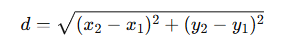

Sebagai contoh, kita hitung jarak antara titik 1 (1,2) dan titik 2 (2,1):

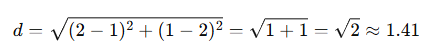

   Lakukan perhitungan yang sama untuk semua titik terhadap titik lainnya.

4. **Identifikasi Tetangga Terdekat untuk Setiap Titik**:  
Setelah semua jarak dihitung, urutkan berdasarkan jarak terdekat untuk setiap titik. Ambil tiga tetangga terdekat (karena kita pilih k=3).

Contoh untuk titik ID 1 (1,2):

- Jarak ke ID 2 (2,1) → 1.41
- Jarak ke ID 3 (2,3) → 1.41
- Jarak ke ID 4 (3,2) → 2.00

Tetangga terdekat: ID 2, ID 3, ID 4.

5. **Hitung Jarak K-Terjauh untuk Setiap Titik**:  
- Ambil jarak ke tetangga terjauh dari tiga tetangga terdekat sebagai skor outlier.
- Misalnya, untuk titik ID 1, jarak terjauh dari tiga tetangga adalah 2.00.

6. **Tentukan Threshold Outlier**:  
- Hitung rata-rata dan standar deviasi dari semua jarak K-Terjauh.
- Threshold ditentukan sebagai:

Threshold=Mean+2×Standard Deviation
- Jika jarak K-Terjauh suatu titik melebihi threshold, maka titik tersebut dianggap outlier.

7. **Identifikasi Outlier**:  
- Titik dengan jarak K-Terjauh yang sangat besar dibandingkan titik lainnya dianggap sebagai outlier.
- Berdasarkan dataset ini, kemungkinan besar titik (10,10), (9,11), dan (11,9) adalah outlier karena berada jauh dari kelompok utama.
## IMPLEMENTASI PAKAI SKLEARN UNTUK DATA CONTOH

In [14]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Dataset contoh
data = {
    'Feature1': [1.0, 2.0, 2.0, 3.0, 10.0, 3.0, 4.0, 5.0, 9.0, 11.0],
    'Feature2': [2.0, 1.0, 3.0, 2.0, 10.0, 4.0, 3.0, 5.0, 11.0, 9.0]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Inisialisasi model LOF dengan k=2 (2 tetangga terdekat)
lof = LocalOutlierFactor(n_neighbors=2)

# Fit model LOF dan prediksi label (1 untuk normal, -1 untuk outlier)
lof_labels = lof.fit_predict(df)

# Menambahkan hasil prediksi ke DataFrame
df['LOF Label'] = lof_labels

# Menampilkan hasil
print(df)

# Menampilkan jumlah outlier
num_outliers = (lof_labels == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

# Menampilkan data outlier
outliers = df[df['LOF Label'] == -1]
print("\nData Outlier:")
print(outliers)


   Feature1  Feature2  LOF Label
0       1.0       2.0          1
1       2.0       1.0          1
2       2.0       3.0          1
3       3.0       2.0          1
4      10.0      10.0          1
5       3.0       4.0          1
6       4.0       3.0          1
7       5.0       5.0         -1
8       9.0      11.0          1
9      11.0       9.0          1

Jumlah outlier: 1

Data Outlier:
   Feature1  Feature2  LOF Label
7       5.0       5.0         -1


- Hanya (5.0, 5.0) dianggap outlier (-1).
- Kenapa bukan titik (10,10) atau (9,11)?
Karena LOF membandingkan titik dengan tetangganya, bukan sekadar melihat apakah titik itu jauh dari pusat data.
- (10,10), (9,11), dan (11,9) punya tetangga yang dekat, sehingga tetap dianggap normal.
- Kenapa (5.0,5.0) jadi outlier?
Titik ini berada di tengah-tengah antara kelompok kecil dan kelompok besar, jadi kepadatannya lebih rendah dibandingkan tetangga lainnya.
LOF melihat bahwa titik ini tidak memiliki banyak tetangga dekat, sehingga dianggap outlier.

Kesimpulan
- Local Outlier Factor (LOF) mendeteksi outlier berdasarkan kepadatan lokal titik data, bukan sekadar jarak jauh.
- Titik (5.0,5.0) dianggap outlier karena kurang memiliki tetangga dekat.
- Titik yang jauh seperti (10,10) tetap dianggap normal karena ada tetangga yang cukup dekat.
- Pemilihan jumlah tetangga (n_neighbors) berpengaruh besar terhadap hasil deteksi outlier.

In [13]:
%pip install pymysql
%pip install psycopg2

Perintah %pip install pymysql dan %pip install psycopg2 digunakan untuk menginstal pustaka yang memungkinkan Python berkomunikasi dengan database MySQL (pymysql) dan PostgreSQL (psycopg2). Dengan pustaka ini, Python dapat menjalankan perintah SQL untuk mengakses, mengelola, dan memanipulasi data dalam database tersebut

In [16]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-289a0f88-pendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_1tT_bnHq81keqZ9n-wh",
        database="defaultdb",
        port=22825
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-9b686fb-pendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ZuFdVS1OQkmHx4P1Wtp",
        database="defaultdb",
        port=22825
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

Kode diatas hanya untuk menggabungkan data dari 2 database saja

In [18]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")

outliers = df_merge[df_merge["outlier_label"] == -1]
print("\nData Outlier:")
print(outliers.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa           1.5          0.2           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

Kode ini menggabungkan data dari MySQL dan PostgreSQL berdasarkan kolom "id" dan "class" menggunakan metode inner join. Setelah data digabungkan, hanya kolom numerik tertentu yang digunakan sebagai fitur untuk analisis, yaitu "petal_length", "petal_width", "sepal_length", dan "sepal_width".

Selanjutnya, algoritma Local Outlier Factor (LOF) diterapkan dengan 90 tetangga terdekat untuk mendeteksi data yang memiliki kepadatan rendah dibandingkan dengan titik-titik di sekitarnya. Data yang terdeteksi sebagai outlier diberi label -1, sedangkan data normal diberi label 1.

Hasil analisis ini kemudian ditambahkan kembali ke dalam dataframe untuk mempermudah interpretasi. Setelah itu, jumlah outlier dihitung dan ditampilkan, serta semua data yang terdeteksi sebagai outlier dicetak untuk dianalisis lebih lanjut. Dengan pendekatan ini, dataset dapat dibersihkan atau dianalisis lebih mendalam untuk memahami pola anomali yang ada.